In [90]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt

In [91]:
acessos = pd.read_pickle("./datasets/acesso.pkl")
acessos.head()

,id_acessos,fim_acesso,id_consumidor_ecommerce,inicio_acesso,ecommerce_id_ecommerce,localidade
0,1,2019-04-22 01:26:28,507,2019-04-22 01:21:24,1,MS - Paraíso das Águas
1,2,2019-06-08 01:16:17,486,2019-06-08 01:11:29,1,PR - Lunardelli
2,3,2019-06-30 01:29:58,483,2019-06-30 01:24:49,1,BA - Santana
3,4,2021-04-20 01:37:07,494,2021-04-20 01:31:56,1,PR - Ângulo
4,5,2020-02-14 01:39:16,510,2020-02-14 01:34:11,1,SC - Sombrio


In [92]:
vendas = pd.read_pickle("./datasets/evento.pkl")
vendas.head()

,id_evento,data_compra,id_consumidor_ecommerce,nome_categoria,nome_produto,preco,cupom_id_cupom,dominio_status_id_dominio_status,ecommerce_id_ecommerce,data_inclusao,sexo,faixa_etaria
0,1,2019-07-09,507,5,Oakley,2290.55,None,1,1,2021-10-08 19:58:47.313441,1,Terceira Faixa
1,2,2019-08-09,486,2,Puma,2589.61,None,1,1,2021-10-08 19:58:47.313441,0,Terceira Faixa
2,3,2019-09-15,483,1,Lacoste,2265.90,None,1,1,2021-10-08 19:58:47.313441,0,Terceira Faixa
3,4,2020-08-17,494,3,Lacoste,2009.16,None,1,1,2021-10-08 19:58:47.313441,0,Terceira Faixa
4,5,2020-03-29,510,2,Adidas,2284.87,None,1,1,2021-10-08 19:58:47.313441,1,Primeira Faixa


<AxesSubplot:xlabel='data_compra', ylabel='id_evento'>

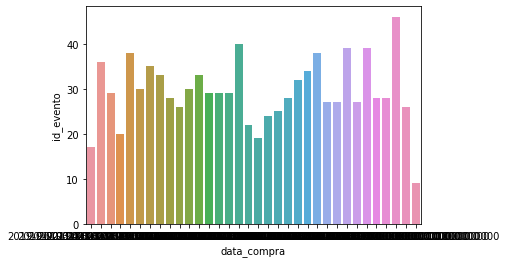

In [93]:
vendas_mes = vendas.groupby(pd.Grouper(key="data_compra", freq="M")).agg({"id_evento":"count"}).reset_index()
vendas_mes.data_compra = vendas_mes.data_compra.values.astype("datetime64[M]")
sns.barplot(x = "data_compra", y = "id_evento", data=vendas_mes)

In [94]:
data_compra =  vendas_mes.data_compra.values
contagem = vendas_mes.id_evento.values
X = data_compra.reshape(len(data_compra), 1).astype("float")
y = contagem.reshape(len(contagem), 1)
model = LinearRegression().fit(X, y)
model.score(X, y)

0.00041862122222702247

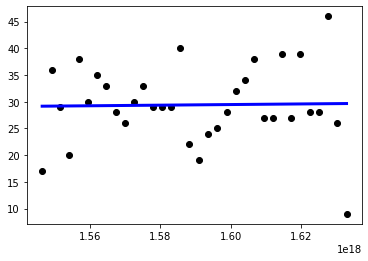

In [95]:
plt.scatter(X, y, color = "black")
plt.plot(X, model.predict(X), color="blue", linewidth=3)
plt.show()

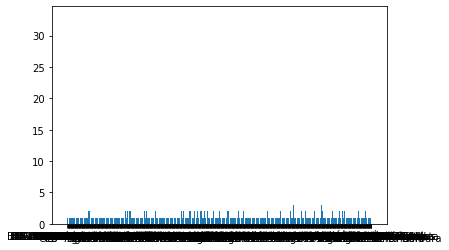

In [96]:
acessos_local = acessos.groupby("localidade").agg({"id_acessos": "count"}).reset_index()
plt.bar(acessos_local.localidade.values, acessos_local.id_acessos.values)
plt.show()

<AxesSubplot:xlabel='inicio_acesso', ylabel='id_acessos'>

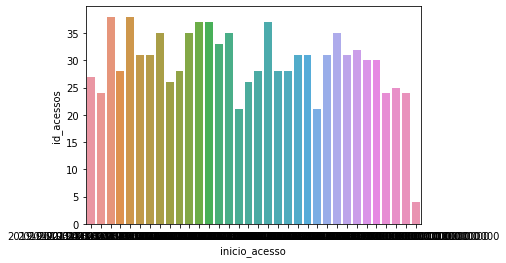

In [97]:
acessos_mes = acessos.groupby(pd.Grouper(key="inicio_acesso", freq = "M")).agg({"id_acessos": "count"}).reset_index()
acessos_mes.inicio_acesso = acessos_mes.inicio_acesso.values.astype("datetime64[M]")
sns.barplot(x = "inicio_acesso", y= "id_acessos", data = acessos_mes)

In [98]:
acessos_mes.id_acessos.corr(vendas_mes.id_evento)

0.29483177255324733

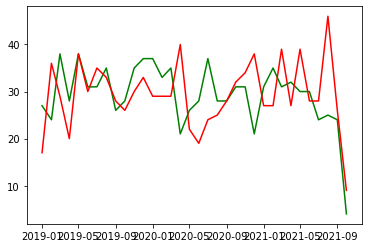

In [99]:
plt.plot(acessos_mes.inicio_acesso, acessos_mes.id_acessos, color = "green")
plt.plot(vendas_mes.data_compra, vendas_mes.id_evento, color = "red")
plt.show()

In [100]:
inicio_acesso = acessos_mes.inicio_acesso.values
contagem = acessos_mes.id_acessos.values
X = inicio_acesso.reshape(len(inicio_acesso), 1).astype("float")
y = contagem.reshape(len(contagem), 1)
acessos_model = LinearRegression().fit(X, y)
acessos_model.score(X, y)

0.14654202153191753

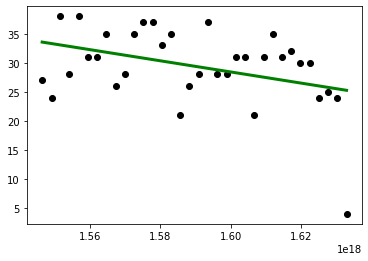

In [101]:
plt.scatter(X, y, color = "black")
plt.plot(X, acessos_model.predict(X), color = "green", linewidth = 3)
plt.show()